
# import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# read the datasets

In [2]:
data=pd.read_csv("Crop_recommendation.csv")
data.head(2200)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
data.shape

(2200, 8)

In [4]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
N              2200 non-null int64
P              2200 non-null int64
K              2200 non-null int64
temperature    2200 non-null float64
humidity       2200 non-null float64
ph             2200 non-null float64
rainfall       2200 non-null float64
label          2200 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
#so there is no null values in this datasets

In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
data.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [9]:
data['label'].value_counts()

coffee         100
orange         100
mango          100
banana         100
blackgram      100
chickpea       100
mothbeans      100
kidneybeans    100
jute           100
muskmelon      100
rice           100
coconut        100
maize          100
grapes         100
cotton         100
pigeonpeas     100
papaya         100
apple          100
watermelon     100
pomegranate    100
lentil         100
mungbean       100
Name: label, dtype: int64

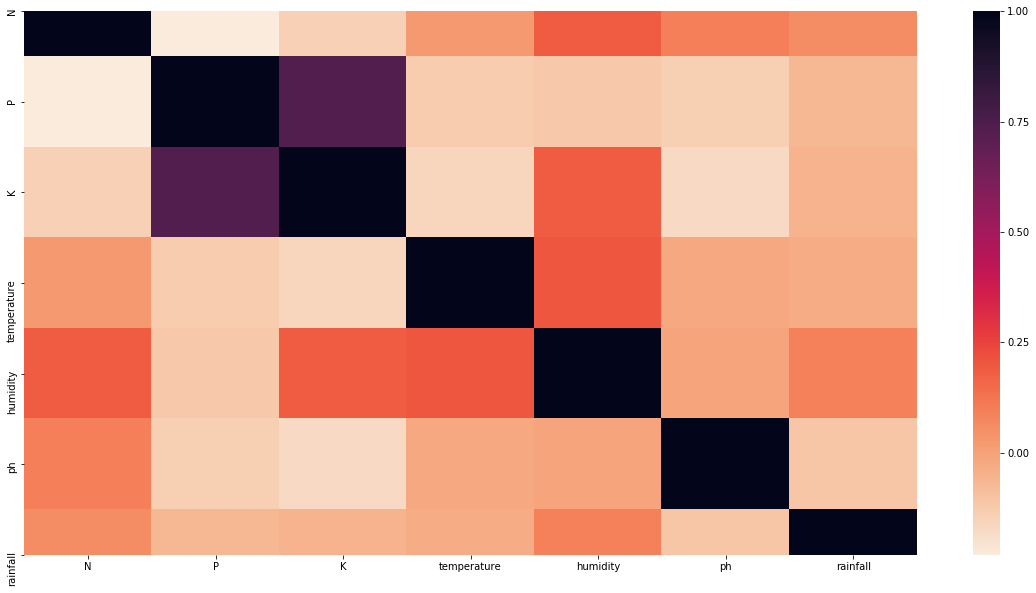

In [10]:
f,ax=plt.subplots(figsize=(20,10))
corr=data.corr()
sns.heatmap(corr , ax=ax ,   cmap="rocket_r")

In [11]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

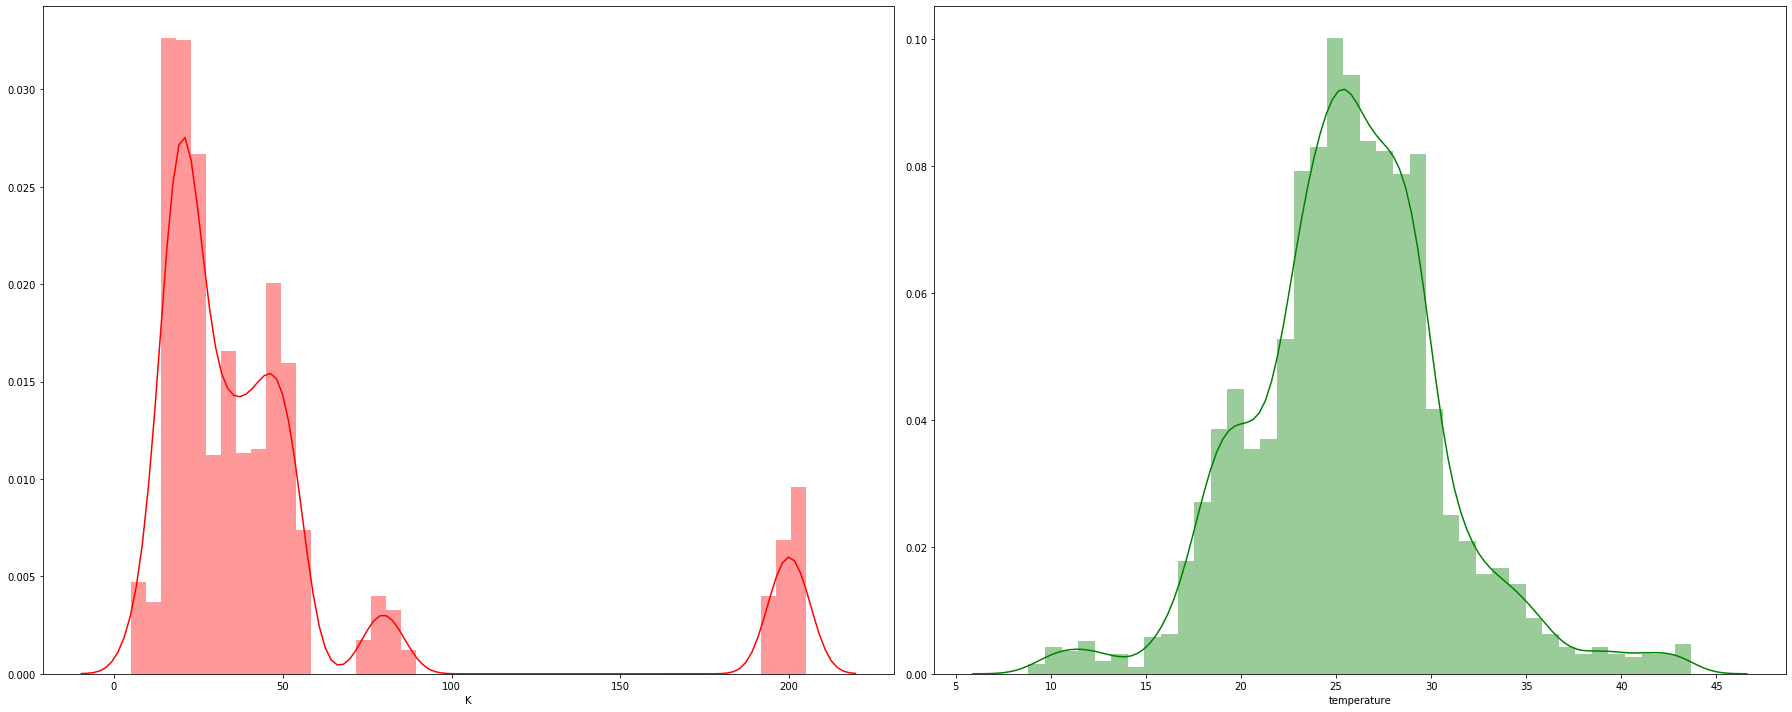

In [12]:
f= plt.figure(figsize=(25,10))
ax=f.add_subplot(121)
sns.distplot(data['K'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['temperature'] , color ='green' , ax = ax)
plt.tight_layout()

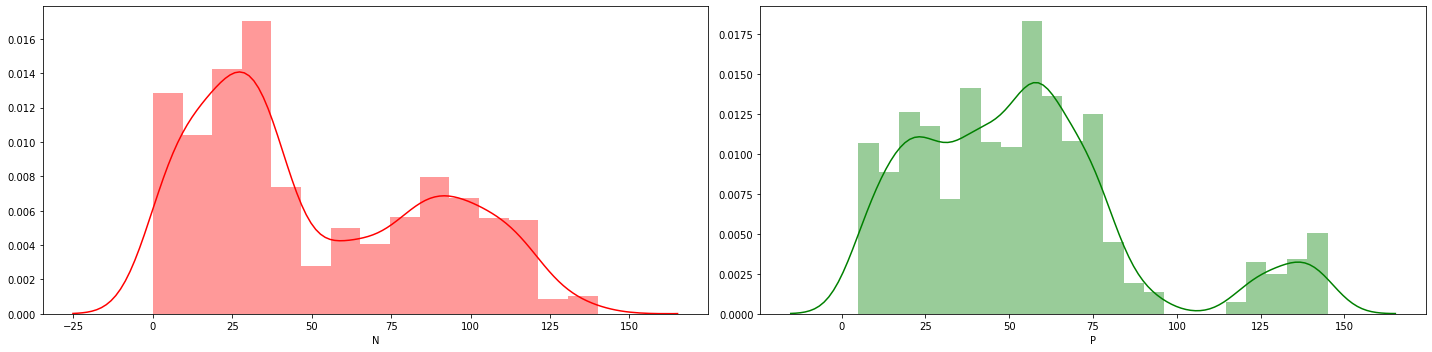

In [13]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['N'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['P'] , color ='green' , ax = ax)
plt.tight_layout()

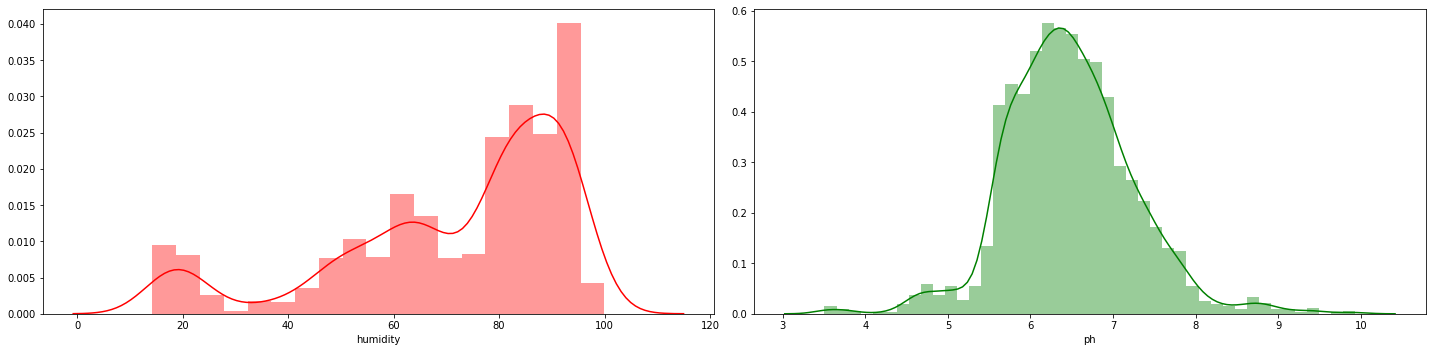

In [14]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['humidity'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['ph'] , color ='green' , ax = ax)
plt.tight_layout()

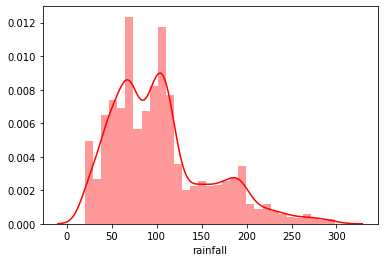

In [15]:
sns.distplot(data['rainfall'],color ='red')

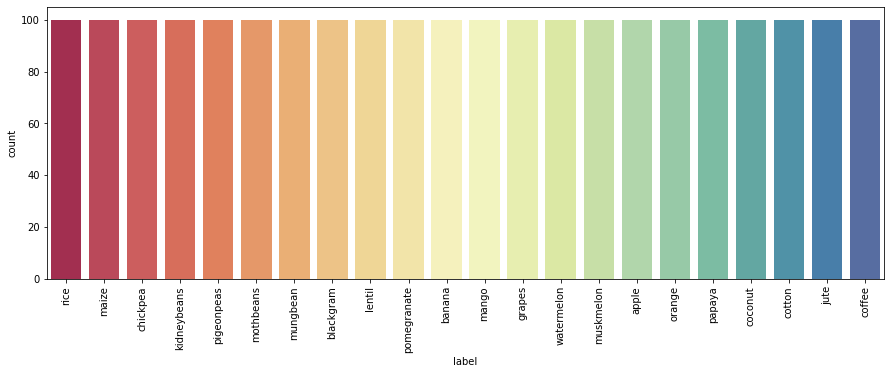

In [16]:
f= plt.figure(figsize=(15,5))
sns.countplot(data['label'] , palette = 'Spectral')
plt.xticks(rotation=90)
plt.show()

In [17]:
X=data.drop("label",axis=1)

In [18]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


# univariate analysis

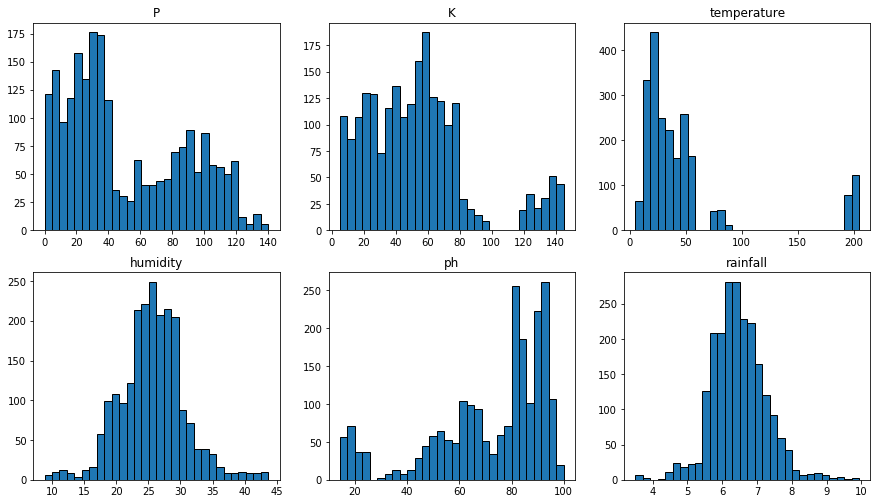

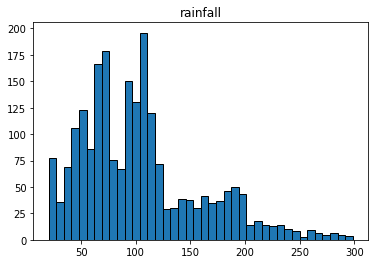

In [19]:
all_columns = data.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(3,3,i)
    plt.hist(data[column],bins=30,edgecolor='k')
    plt.title(data.columns[i])
    i+=1
plt.show()

plt.hist(data[all_columns[-1]],bins=40,edgecolor='k')
plt.title("rainfall")
plt.show()

# bivariate analysis

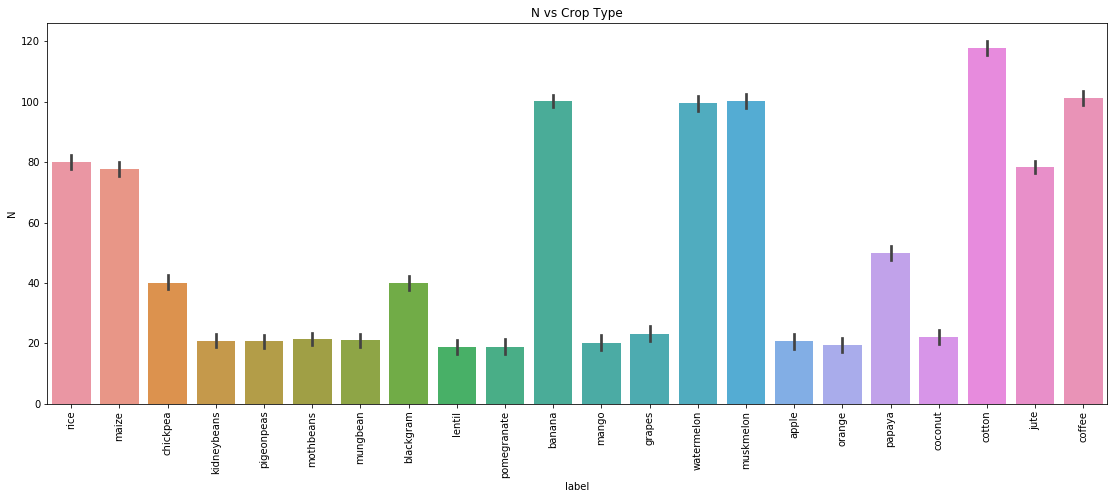

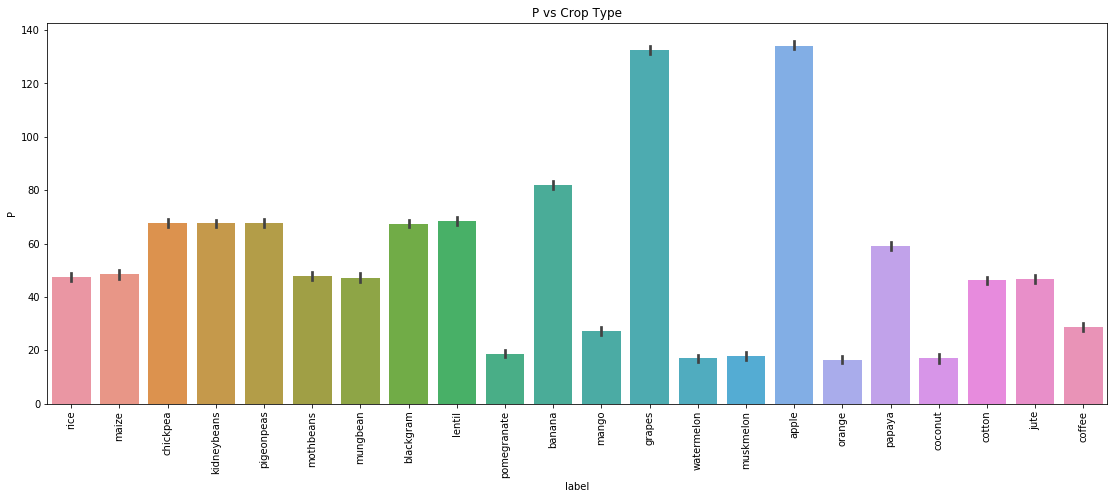

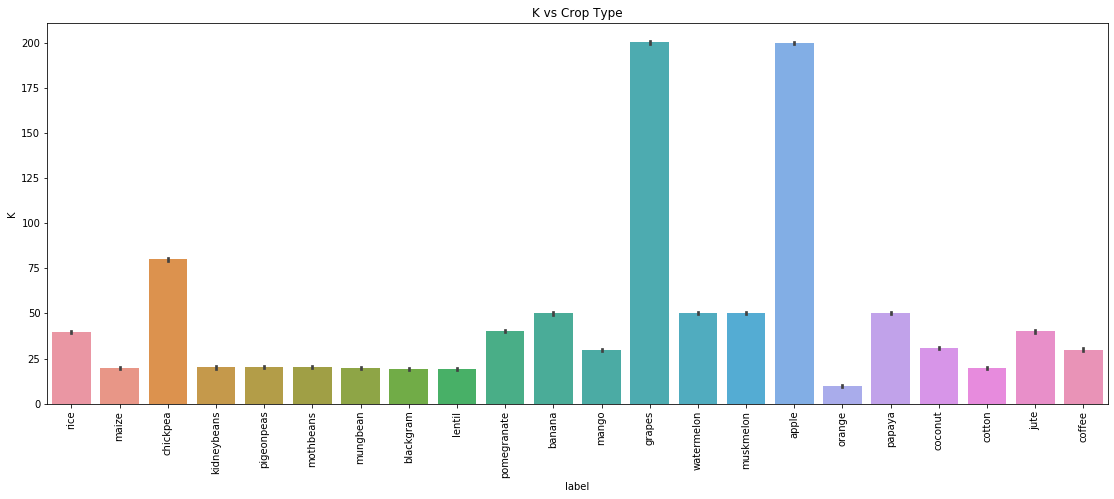

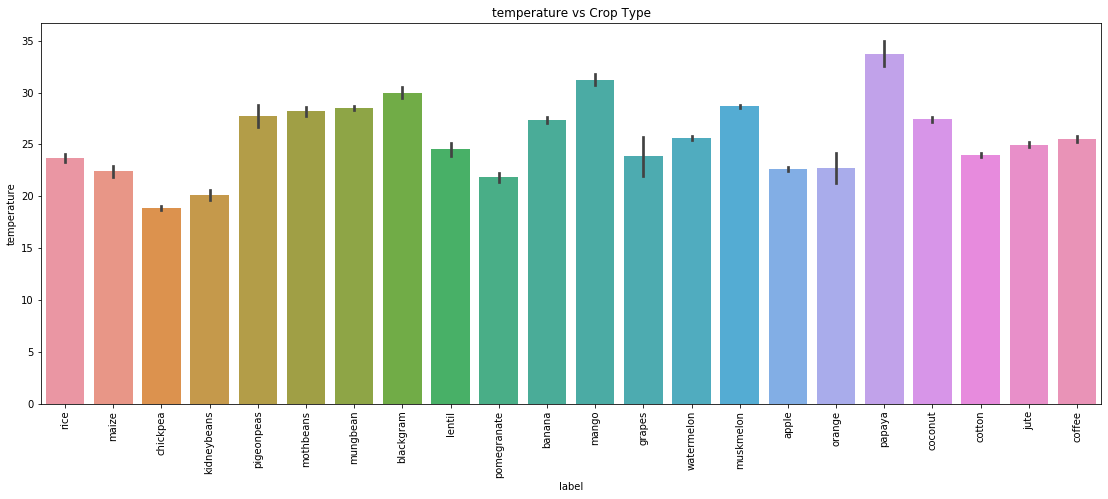

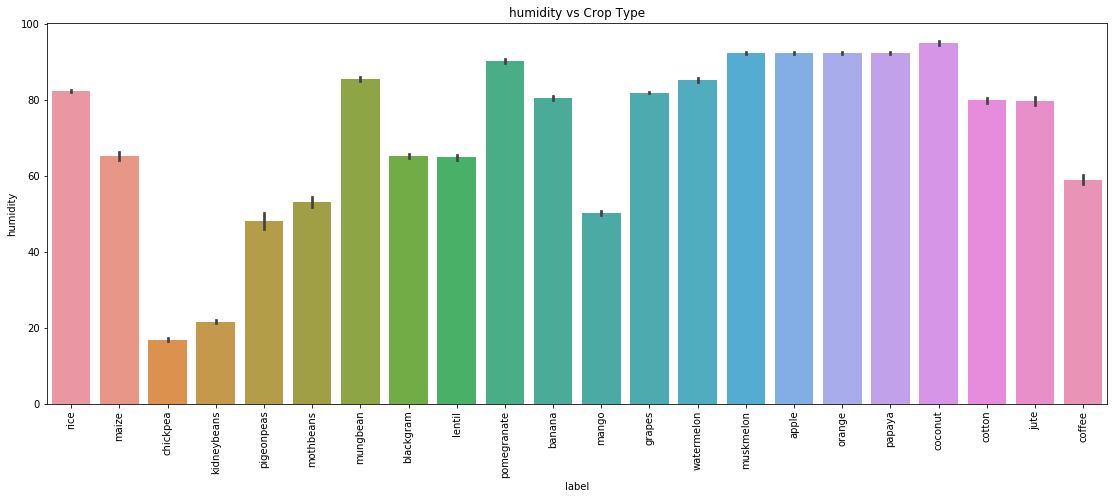

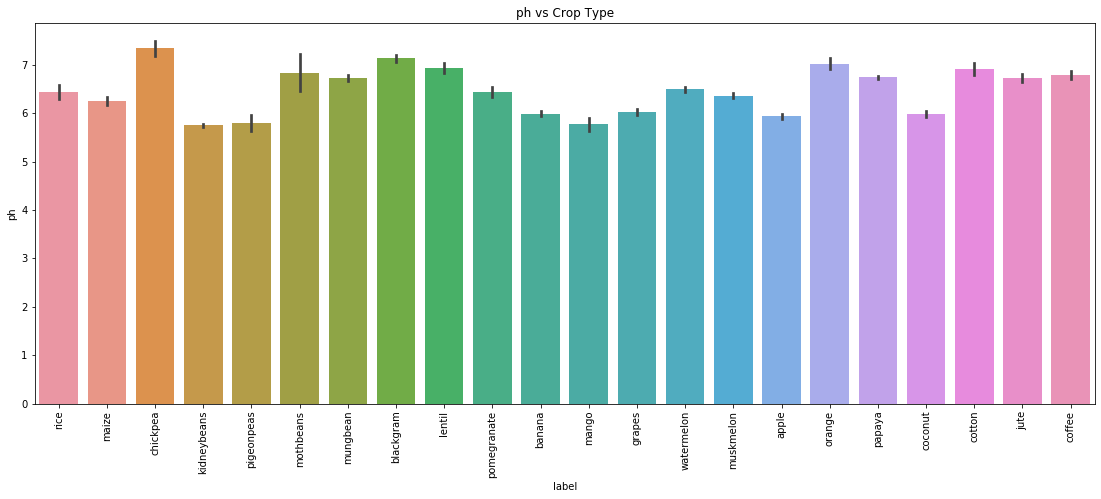

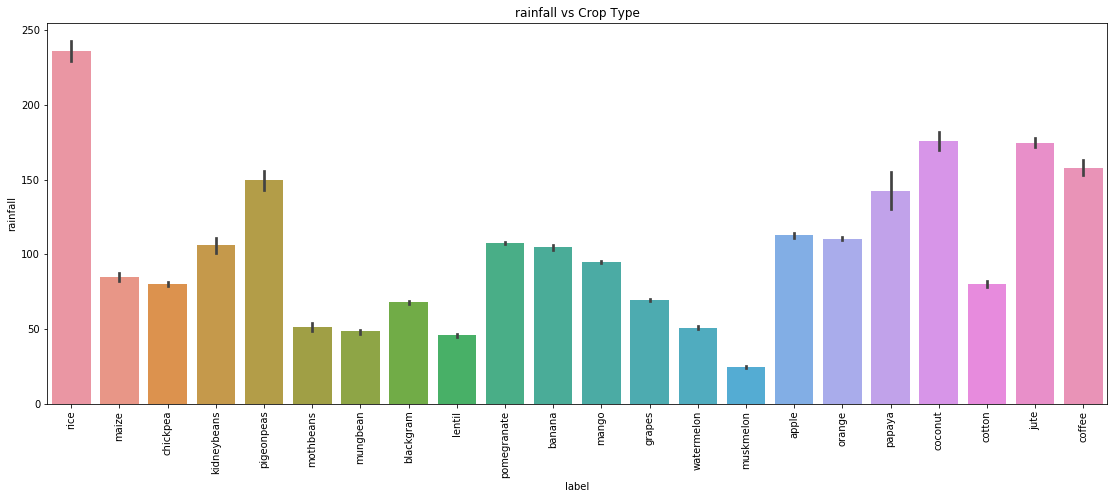

In [20]:
for column in all_columns:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "label", y = column, data = data)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

<Figure size 4104x3672 with 0 Axes>

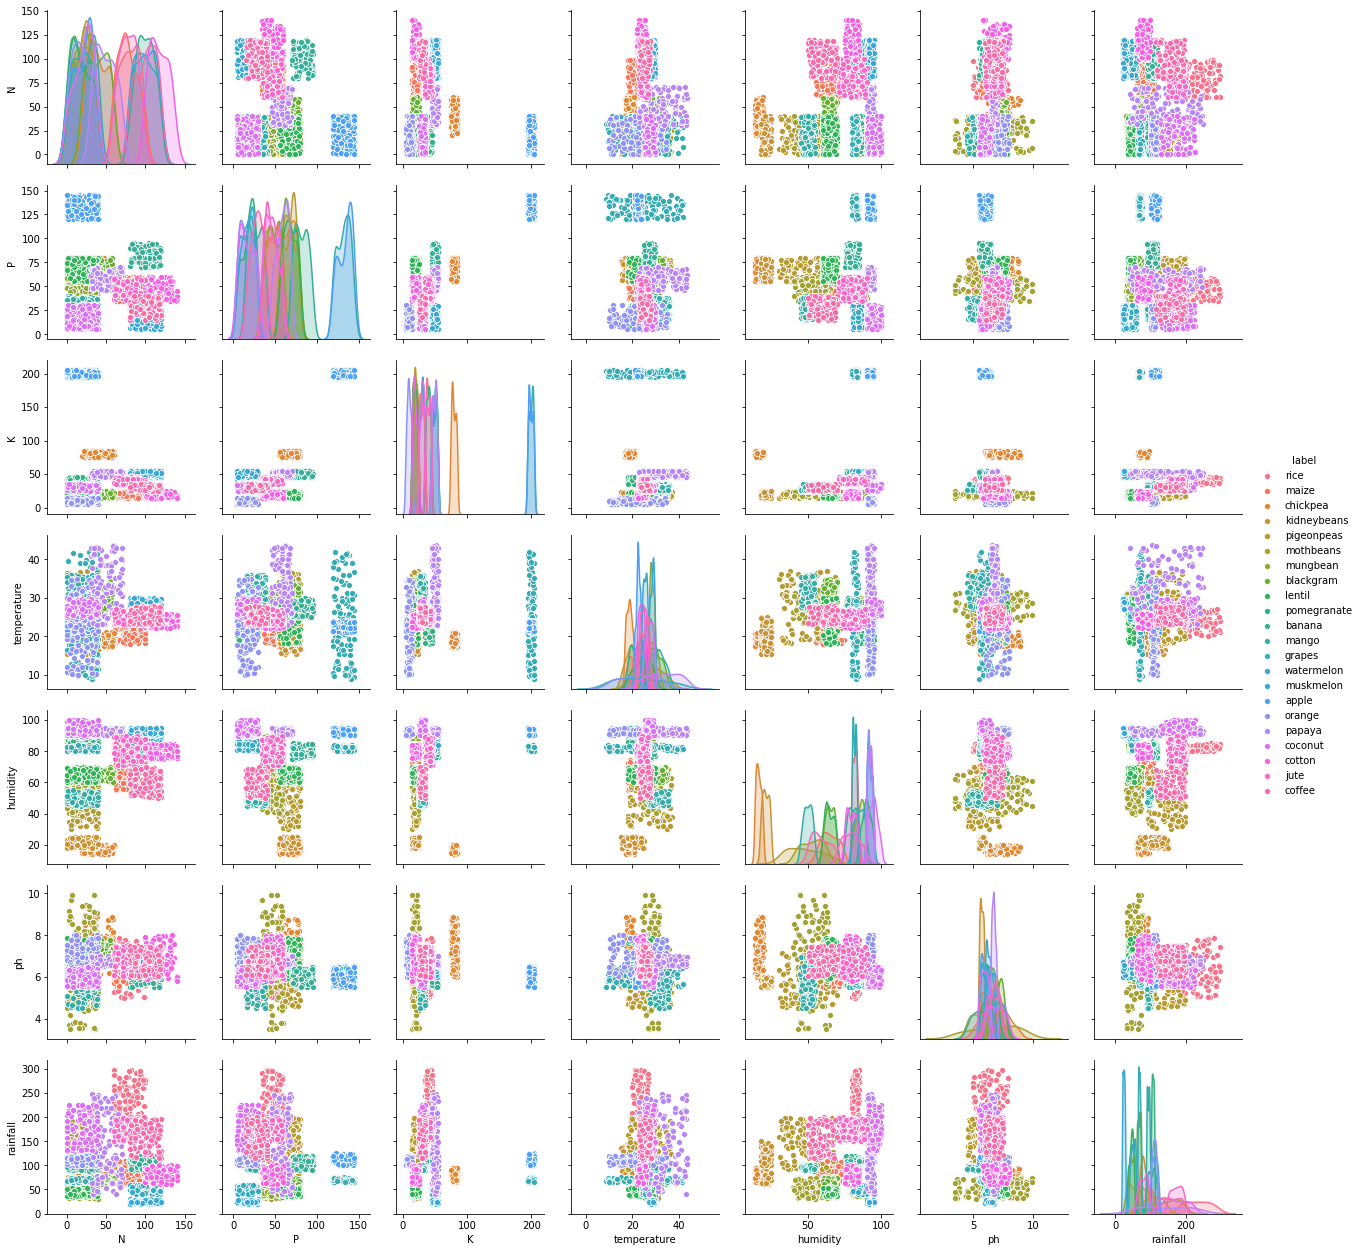

In [21]:
plt.figure(figsize=(57,51))
sns.pairplot(data,hue="label")
plt.show()

In [22]:
sum_coln=data['N']+data["P"]+data["K"]
data[" sum of minerals"]=sum_coln

In [23]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,sum of minerals
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,175
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,184
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,159
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,149
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,162


In [24]:
df=data.groupby("label")[["K","P","N"," sum of minerals"]].mean()
df

,K,P,N,sum of minerals
label,,,,
apple,199.89,134.22,20.80,354.91
banana,50.05,82.01,100.23,232.29
blackgram,19.24,67.47,40.02,126.73
chickpea,79.92,67.79,40.09,187.80
coconut,30.59,16.93,21.98,69.50
coffee,29.94,28.74,101.20,159.88
cotton,19.56,46.24,117.77,183.57
grapes,200.11,132.53,23.18,355.82
jute,39.99,46.86,78.40,165.25


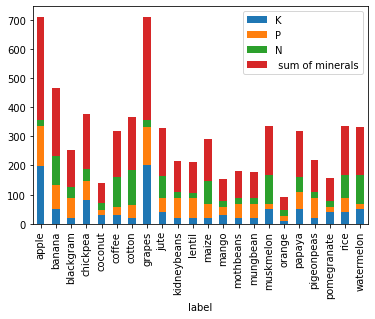

In [25]:
 df.plot(kind="bar",stacked=True)

# seperating target and features lable


In [26]:
X=data.drop("label",axis=1)

In [27]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall,sum of minerals
0,90,42,43,20.879744,82.002744,6.502985,202.935536,175
1,85,58,41,21.770462,80.319644,7.038096,226.655537,184
2,60,55,44,23.004459,82.320763,7.840207,263.964248,159
3,74,35,40,26.491096,80.158363,6.980401,242.864034,149
4,78,42,42,20.130175,81.604873,7.628473,262.717340,162


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
data['label'] = le.fit_transform(data['label'])

In [31]:
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label,sum of minerals
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,175
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,184
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,159
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,149
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,162


In [32]:
y = data['label']
y.head(2200)

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

# train test spit 

In [33]:
model = []
accuracy = []

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state=42)

# logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
LG = LogisticRegression()
LG.fit(X_train , y_train)

C:\Users\arsah\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arsah\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
LG_accuracy = LG.score(X_test,y_test)

In [38]:
LG_accuracy

0.9227272727272727

In [39]:
accuracy.append(LG_accuracy)
model.append('Logistic Regression')

# decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
predict = DT.predict(X_test)


In [42]:

model.append('Decision Tree')

In [43]:
from sklearn.model_selection import cross_val_score
DT_accuracy= cross_val_score(DT,X,y,cv=5)
acc_DT=DT_accuracy.mean()
print(acc_DT)
accuracy.append(acc_DT)

0.9868181818181817


# guassian naive bayes

In [44]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x=cross_val_score(NaiveBayes,X,y,cv=5)
acc_NV=x.mean()
print(acc_NV)


accuracy.append(acc_NV)
model.append('Naive Bayes')

print(classification_report(y_test,predicted_values))

0.9945454545454545
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        23
           8       0.87      1.00      0.93        34
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        25
        

# support vector machine(SVM)


In [45]:
from sklearn.svm import SVC

SVM = SVC(gamma=.001)

SVM.fit(X_train,y_train)

predicted_values = SVM.predict(X_test)

x = cross_val_score(SVM,X,y,cv=5).mean()
print("SVM's Accuracy is: ", x)
accuracy.append(x)
model.append('SVM')


print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.9863636363636363
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       0.96      1.00      0.98        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      0.93      0.97        30
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        23
           8       0.73      0.97      0.84        34
           9       0.97      1.00      0.99        36
          10       0.96      1.00      0.98        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       1.00      0.97      0.99        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.0

# random foreset

In [46]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train , y_train)

C:\Users\arsah\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
RF_accuracy = round(cross_val_score(RF,X,y,cv=5).mean(),10)

In [48]:
RF_accuracy

0.9922727273

In [49]:
accuracy.append(RF_accuracy)
model.append('Random Forest')

In [50]:
model

['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'SVM', 'Random Forest']

In [51]:
accuracy

[0.9227272727272727,
 0.9868181818181817,
 0.9945454545454545,
 0.9863636363636363,
 0.9922727273]

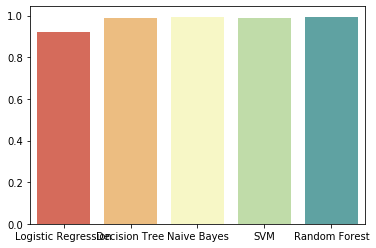

In [52]:
sns.barplot(x = model , y = accuracy ,palette ='Spectral')